In [1]:
# Import headers
from vehicle import Vehicle
from utility.parser import read_yaml
from state_models.vehicle_state import VehicleState
from scipy.optimize._root import root
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
parameters_file = 'vehicles/metric_test.yaml'
car = Vehicle(parameters_file)
vehicle_state = VehicleState(car.params)
df = pd.DataFrame([car.params['params']])
display(df.T)

Initializing vehicle object
reading "vehicles/metric_test.yaml"


,0
mass,270.0
cg_bias_f,0.5
cg_height,0.307
wheelbase,1.535
trackwidth_f,1.241
trackwidth_r,1.241
inertia_tensor,"[[1, 1, 1], [1, 1, 1], [1, 1, 132.29]]"
rollc_f,0.028
rollc_r,0.028
pitchc,0.0


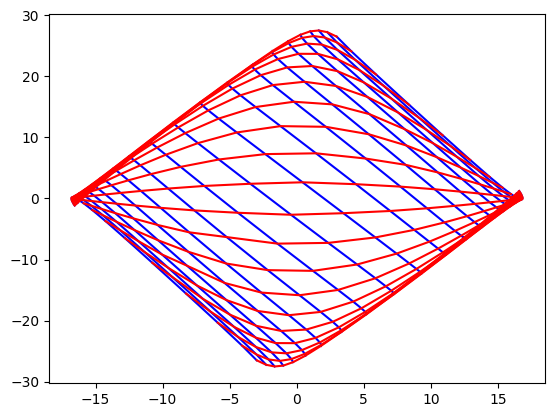

In [3]:
x0 = np.array([0.0, 0.0, 0.0])
v = 10.0
psi_dt = 0.0
eta = 0
body_slip_set = np.deg2rad(np.linspace(-10,10,20))
steered_angle_set = np.deg2rad(np.linspace(-15,15,20))
surface_x = np.zeros((len(body_slip_set),len(steered_angle_set),2))
surface_y = np.zeros((len(body_slip_set),len(steered_angle_set),3))
for i, beta in enumerate(body_slip_set):
    for j, delta in enumerate(steered_angle_set):
        def _solve(x):
            r = vehicle_state.eval(v,psi_dt,beta,delta,eta, *x, residuals=True)
            return r
        soln = root(_solve, x0, method='broyden2',options={"xtol":1e-5})
        if soln.success == False:
            print('solution did not converge')
            print(f'beta: {beta} delta: {delta}')
            # print(soln)
        surface_x[i,j,:] = [beta, delta]
        surface_y[i,j,:] = soln.x

fig = plt.figure()
for i, beta in enumerate(body_slip_set):
    plt.plot(surface_y[i,:,1],surface_y[i,:,2],'b')
for j, delta in enumerate(steered_angle_set):
    plt.plot(surface_y[:,j,1],surface_y[:,j,2],'r')
plt.show()